#  **Instgram Dataset Analysis**

First let's import and explore the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
da = pd.read_csv("..\\data\\Instagram_Analytics.csv")
da.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [4]:
da.shape

(29999, 15)

In [5]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


In [6]:
da.nunique()

post_id             29999
upload_date           366
media_type              4
likes               27858
comments             9495
shares               4991
saves               12943
reach               29787
impressions         29781
caption_length       2201
hashtags_count         31
followers_gained     1001
traffic_source          6
engagement_rate      4942
content_category       10
dtype: int64

In [7]:
da.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


## **Is the dataset clean?**

In [8]:
da.dropna(inplace=True)
da.drop_duplicates(inplace=True)


In [9]:
da.duplicated().sum()

np.int64(0)

In [10]:
da.isna().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

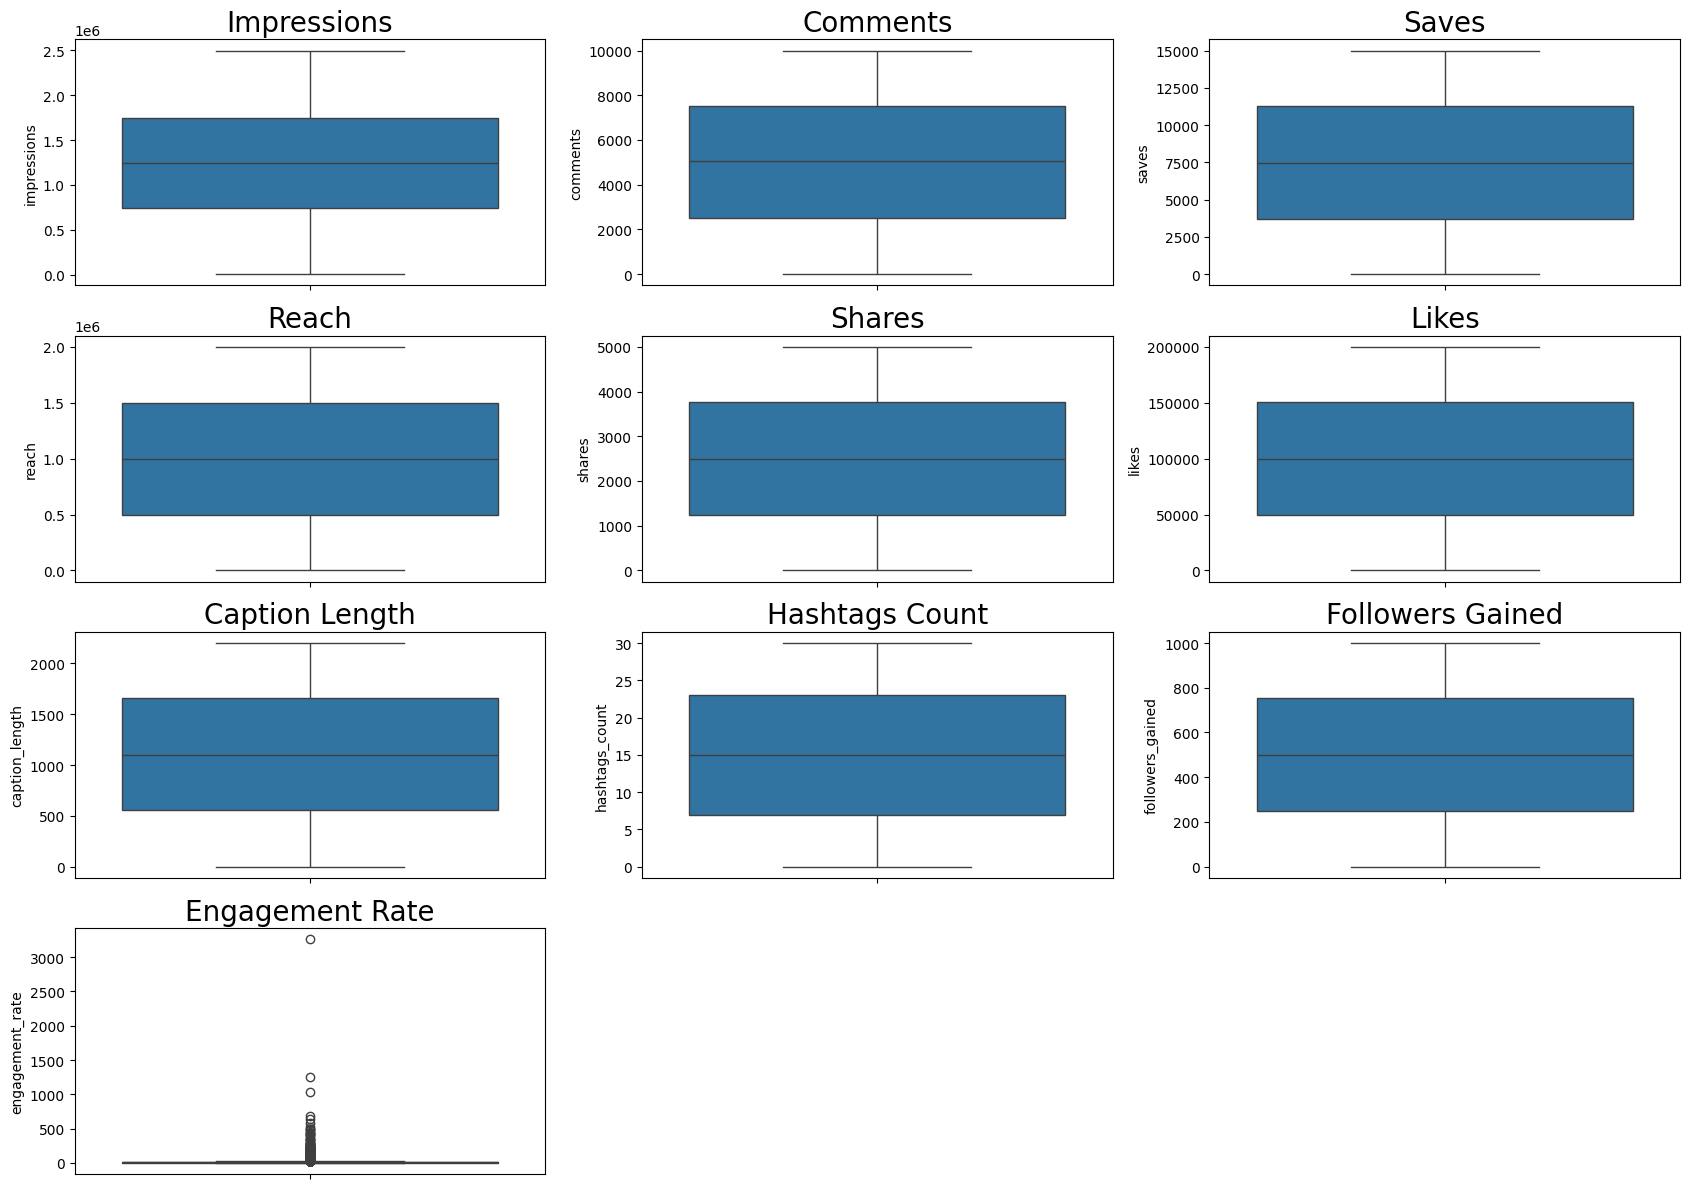

In [11]:
columns = [
    "impressions", "comments", "saves", "reach", "shares", 
    "likes", "caption_length", "hashtags_count", "followers_gained", "engagement_rate"
]

titles = [
    "Impressions", "Comments", "Saves", "Reach", "Shares", 
    "Likes", "Caption Length", "Hashtags Count", "Followers Gained", "Engagement Rate"
]
plt.figure(figsize=(17, 12))

# Loop through columns and titles
for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    plt.title(title, fontsize=20)
    sns.boxplot(da[col])

plt.tight_layout()
plt.show()

In [12]:
Q1 = da['engagement_rate'].quantile(0.25)
Q3 = da['engagement_rate'].quantile(0.75)
iqr = Q3 -Q1 
lower  = Q1 - 1.5* iqr
upper  = Q3 + 1.5* iqr
outliers = pd.DataFrame(da[(da["engagement_rate"] > upper ) | (da['engagement_rate'] < lower)])
print("Number of Outlier Posts:",len(outliers))


Number of Outlier Posts: 2557


 After reviewing the data it turns out the data dosen't have any missing values or duplicated inputs , but it appers that engagment rate coulumn have massive number of outliers (2557) post .

# **Why ?**

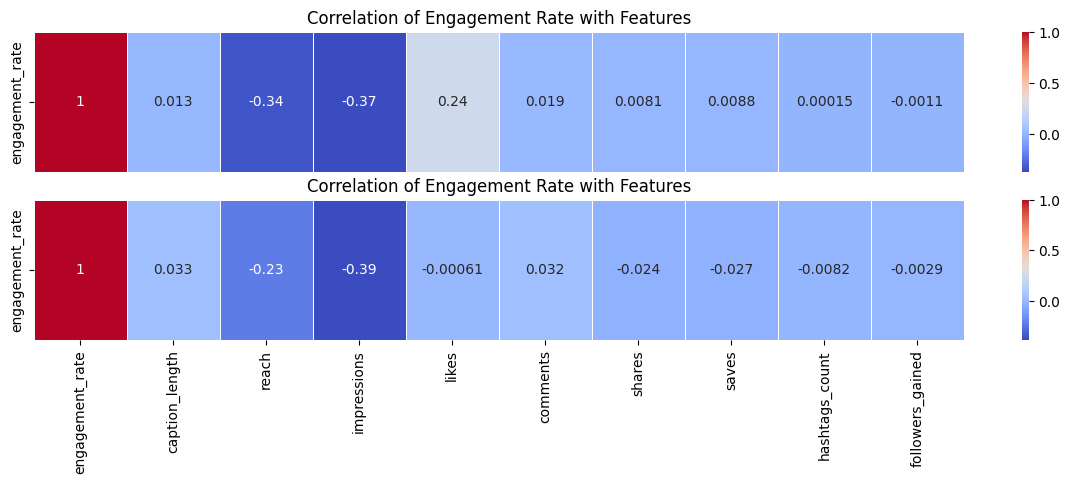

In [13]:
corr_matrix = da[["engagement_rate","caption_length","reach","impressions","likes","comments","shares","saves","hashtags_count","followers_gained"]].corr()
eng_corr = corr_matrix.loc[["engagement_rate"]]
corr_matrix_outliers = outliers[["engagement_rate","caption_length","reach","impressions","likes","comments","shares","saves","hashtags_count","followers_gained"]].corr()
eng_corr_outliers = corr_matrix_outliers.loc[["engagement_rate"]]

plt.figure(figsize=(15,4))
plt.subplot(211)
sns.heatmap(eng_corr,annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Engagement Rate with Features")
plt.xticks([])
plt.subplot(212)
sns.heatmap(eng_corr_outliers,annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Engagement Rate with Features")
plt.show()

#### The correlation results reveal that engagement rate is most strongly influenced by reach and impressions, both showing a moderate negative correlation. This indicates that as a post gains more visibility, the interactions received do not increase at the same rate, causing overall engagement rate to decline. In the full dataset, likes show a weak positive correlation with engagement rate, suggesting that posts with more likes tend to achieve slightly higher engagement rates. However, this relationship disappears in the subset of outlier posts. Meanwhile, caption length,  and the other features demonstrate negligible correlations, indicating that these factors do not have  linear associations with engagement rate. Overall, engagement rate appears to be primarily driven by exposure metrics rather than content-level features.

In [14]:
da["upload_date"] = pd.to_datetime(da["upload_date"])
da["year"]  = da["upload_date"].dt.year
da["month"] = da["upload_date"].dt.month
da["day"]   = da["upload_date"].dt.day
da["hour"]  = da["upload_date"].dt.hour
da["quarter"] = da["upload_date"].dt.quarter
del da["upload_date"]

### **When Posts Frequntly published ?**

C:\Users\moust\AppData\Local\Temp\ipykernel_11448\466650481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(da,x="quarter",palette="viridis")


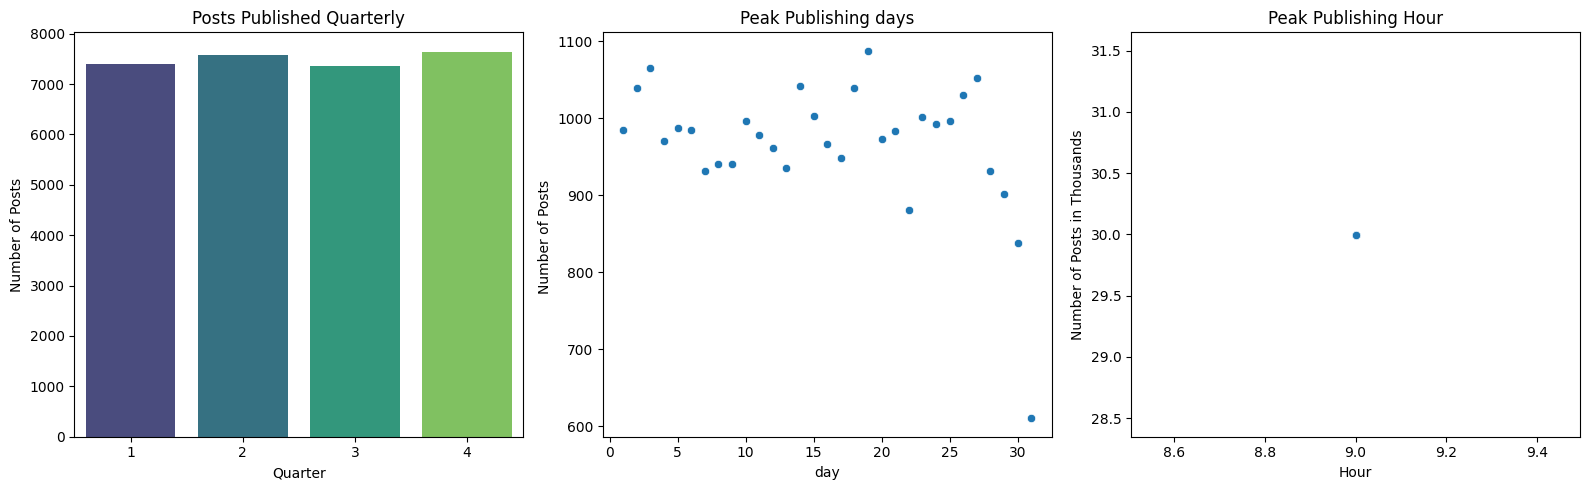

In [15]:
plt.figure(figsize=(16, 5))
plt.subplot(131)
sns.countplot(da,x="quarter",palette="viridis")
plt.xlabel("Quarter")
plt.ylabel("Number of Posts")
plt.title("Posts Published Quarterly")

plt.subplot(133)
sns.scatterplot(da,x="hour",y=(da["post_id"].count()/1000))
plt.xlabel("Hour")
plt.ylabel("Number of Posts in Thousands")
plt.title("Peak Publishing Hour")

plt.subplot(132)
posts_per_day = da.groupby("day")["post_id"].count().reset_index()
posts_per_day.rename(columns={"post_id": "num_posts"}, inplace=True)
sns.scatterplot(posts_per_day,x="day",y="num_posts")
plt.xlabel("day")
plt.ylabel("Number of Posts ")
plt.title("Peak Publishing days")
plt.tight_layout()
plt.show()


#### We observe that posts are distributed almost evenly across the quarters. However, the distribution across days varies: days 3 and 19 have the highest number of posts, while day 31 shows an extremely low count, which is expected since only seven months have 31 days. On the other days, the number of posts ranges roughly between 900 and 1,000. Regarding publishing hours, all posts are scheduled at 9 AM, which is abnormal. Nevertheless, given that this is a synthetic dataset, this behavior is acceptable.

# **Does Traffic Source affects post Discoverability & Growth ?** 

C:\Users\moust\AppData\Local\Temp\ipykernel_11448\2316472031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_bill.values,y=grouped_bill.index,orient="h",ax=ax1 ,palette="Set2")


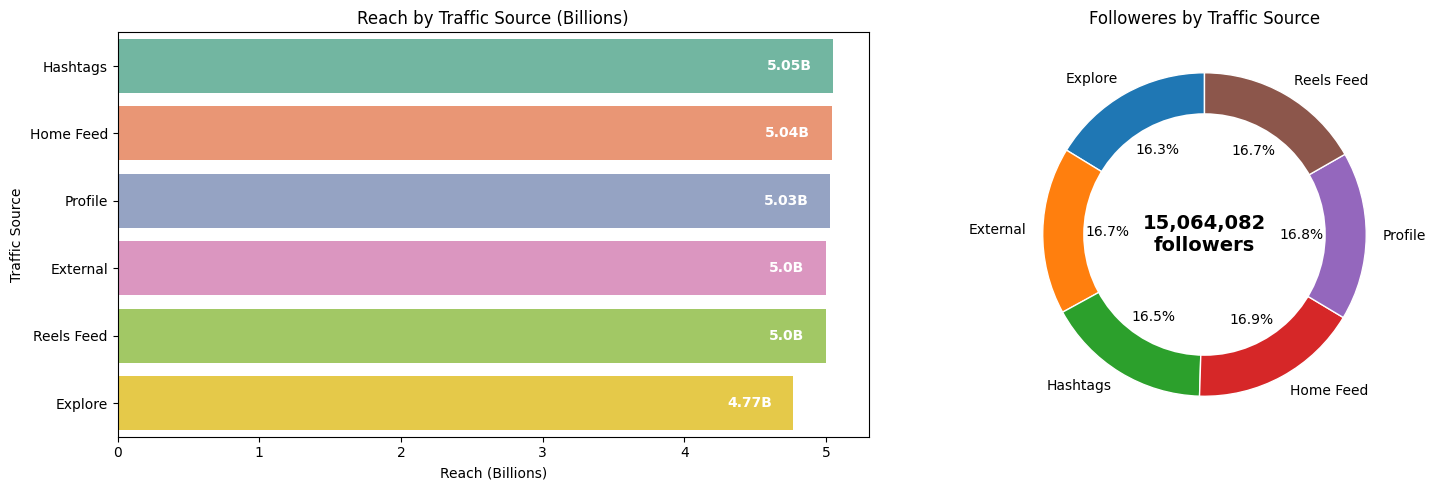

In [16]:
grouped = da.groupby("traffic_source")["reach"].sum()
grouped_bill =( grouped / 1000000000).round(2)
grouped_bill = grouped_bill.sort_values(ascending=False)
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
sns.barplot(x=grouped_bill.values,y=grouped_bill.index,orient="h",ax=ax1 ,palette="Set2")
for i, v in enumerate(grouped_bill.values):
    ax1.text(v - 0.15, i, f"{v}B", va='center', ha='right', color='white', fontweight='bold')
ax1.set_title("Reach by Traffic Source (Billions)")
ax1.set_ylabel("Traffic Source")
ax1.set_xlabel("Reach (Billions)")

traffic = da.groupby("traffic_source").agg({"saves": "sum", "followers_gained": "sum"})
total_followers = traffic["followers_gained"].sum()

ax2 = fig.add_subplot(122)
wedges, texts, autotexts = ax2.pie(
    traffic["followers_gained"],
    labels=traffic.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)
centre_circle = plt.Circle((0, 0), 0.75, fc="white")
ax2.add_artist(centre_circle)
ax2.text(0, 0,f"{total_followers:,}\nfollowers",ha="center",va="center",fontsize=14,fontweight="bold")
ax2.set_aspect("equal")
ax2.set_title("Followeres by Traffic Source")
plt.tight_layout()
plt.show()


### **We notice that traffic source does not significantly affect the reach of posts or followers gained. However, given Instagram’s emphasis on personalizing the Explore feed, it is somewhat surprising that Explore performs slightly worse, with reach approximately 4.8–5% lower than other traffic sources and followers gained 0.2–0.7% lower.**

## **What about content performance ?**


#### **How does content performance vary by media type, particularly for Reels?**

In [17]:
all_da = da.groupby("media_type").agg({"impressions": "sum","reach": "sum","followers_gained": "sum","saves": "sum","engagement_rate":"mean"})
all_da["watch_rate"] = all_da["impressions"] / all_da["reach"]
all_da["followers_per_10k"] = (all_da["followers_gained"] / all_da["reach"]) * 10000
all_da = all_da.reset_index()


C:\Users\moust\AppData\Local\Temp\ipykernel_11448\2896498882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="media_type", y="watch_rate", data=watch_rate ,
C:\Users\moust\AppData\Local\Temp\ipykernel_11448\2896498882.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="media_type", y="followers_per_10k", data=followers10k ,
C:\Users\moust\AppData\Local\Temp\ipykernel_11448\2896498882.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="media_type", y="engagement_rate", data=avg_eng ,


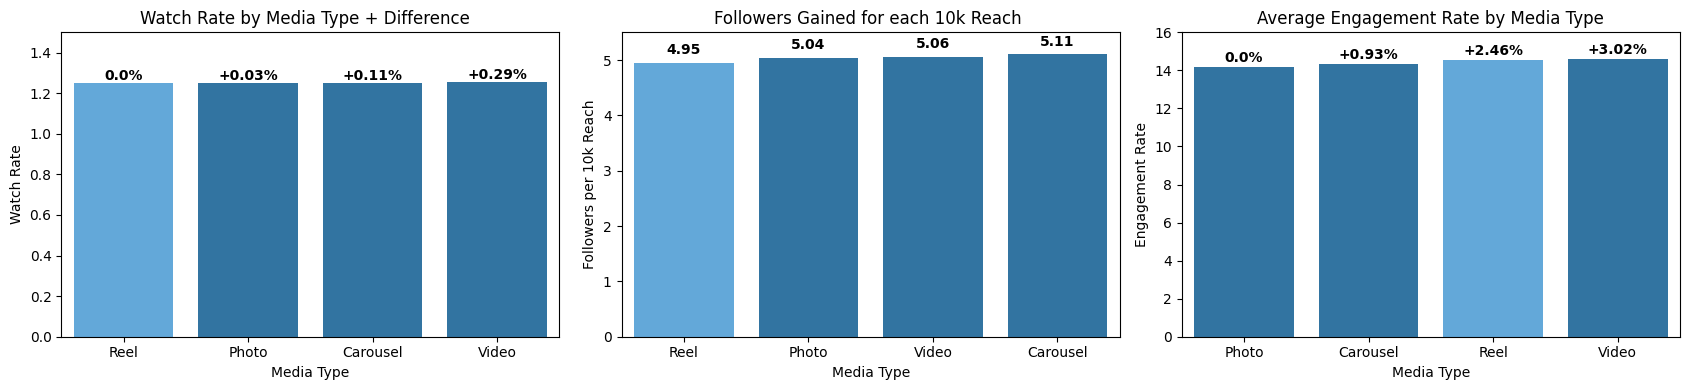

In [18]:
watch_rate = all_da.sort_values(by="watch_rate", ascending=True).reset_index(drop=True)
min_watch_rate = watch_rate["watch_rate"].min()

plt.figure(figsize=(17,4))
plt.subplot(131)
ax = sns.barplot(x="media_type", y="watch_rate", data=watch_rate , 
                 palette=["#4fabed" if m == "Reel" else "#1f77b4" for m in watch_rate["media_type"]]
)
for i, row in watch_rate.iterrows():
    diff_percent = ((row["watch_rate"] - min_watch_rate) / min_watch_rate) * 100 
    if diff_percent == 0:
        label = "0.0%"
    else:
        label = f"+{diff_percent:.2f}%"
    ax.text(i, row["watch_rate"] + 0.0001, label, ha='center', va='bottom', color='black', fontweight='bold')
plt.ylim(0, 1.5)
plt.ylabel("Watch Rate")
plt.xlabel("Media Type")
plt.title("Watch Rate by Media Type + Difference  ")

followers10k = all_da.sort_values(by="followers_per_10k", ascending=True).reset_index(drop=True)
plt.subplot(132)
ax = sns.barplot(x="media_type", y="followers_per_10k", data=followers10k , 
                 palette=["#4fabed" if m == "Reel" else "#1f77b4" for m in followers10k["media_type"]] )

for i, row in followers10k.iterrows():
    ax.text(
        i, row["followers_per_10k"] + 0.1,f"{row['followers_per_10k']:.2f}",ha='center', va='bottom',fontweight='bold')
plt.ylim(0, 5.5)
plt.ylabel("Followers per 10k Reach")
plt.xlabel("Media Type")
plt.title("Followers Gained for each 10k Reach ")

avg_eng = all_da.sort_values(by="engagement_rate", ascending=True).reset_index(drop=True)
min_avg_eng = avg_eng["engagement_rate"].min()
plt.subplot(133)
ax = sns.barplot(x="media_type", y="engagement_rate", data=avg_eng , 
                 palette=["#4fabed" if m == "Reel" else "#1f77b4" for m in avg_eng["media_type"]])
for i, row in avg_eng.iterrows():
    diff_percent = ((row["engagement_rate"] - min_avg_eng) / min_avg_eng) * 100
    if diff_percent <= 0.0001:
        label = "0.0%"
    else:
        label = f"+{diff_percent:.2f}%" 
    ax.text(i,row["engagement_rate"] + 0.1,label,ha='center', va='bottom',color='black', fontweight='bold')
plt.ylim(0, 16)
plt.ylabel("Engagement Rate")
plt.xlabel("Media Type")
plt.title("Average Engagement Rate by Media Type")
plt.tight_layout()
plt.show()

#### We observe that media types perform almost identically in terms of watch rate and followers gained, with Reels slightly behind other formats by only 0.3%, which is insignificant. However, regarding engagement rate, Reels rank second—just 0.56% behind Videos—and outperform Carousels and Photos by approximately 1.53% and 2.5%, respectively.

## **What drives variations in Reels’ performance?**

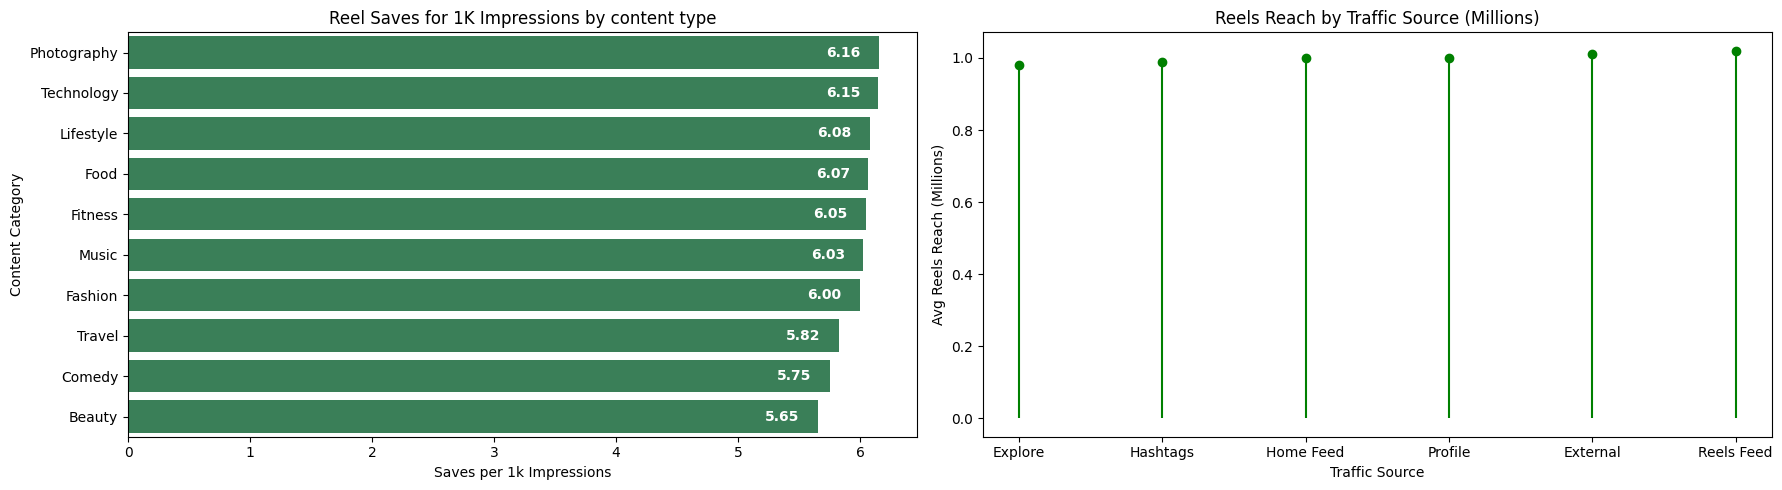

In [19]:
reels = da[da["media_type"]=="Reel"]
reels_cont = reels.groupby("content_category").agg({"impressions":"sum","reach":"sum","saves":"sum"})
reels_cont["saves_for_1K_view"] = ((reels_cont["saves"]/reels_cont["impressions"])*1000).round(3)
reels_cont = reels_cont.sort_values(by="saves_for_1K_view", ascending=False)

plt.figure(figsize=(18,5))
plt.subplot(121)
ax = sns.barplot(x="saves_for_1K_view", y=reels_cont.index, data=reels_cont,orient="h",color="#2E8B57")
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width-0.15 , y, f"{width:.2f}", va='center',ha='right', color='white', fontweight="bold")
ax.set_xlabel("Saves per 1k Impressions")
ax.set_ylabel("Content Category")
ax.set_title("Reel Saves for 1K Impressions by content type")

reels_traffic = ((reels.groupby("traffic_source").agg({"reach":"mean"}))/1000000).round(2)
reels_traffic = reels_traffic.reset_index(drop=False)
reels_traffic  = reels_traffic.sort_values(by="reach", ascending=True)

plt.subplot(122)
plt.stem(reels_traffic["traffic_source"], reels_traffic["reach"], 
        linefmt="green", markerfmt="o", basefmt=" ")
plt.xlabel("Traffic Source")
plt.ylabel("Avg Reels Reach (Millions)")
plt.title("Reels Reach by Traffic Source (Millions)")
plt.tight_layout()
plt.show()


#### We observe that Reels achieve approximately 6–6.16 saves per 1,000 impressions across most content types. However, content types such as Travel, Comedy, and Beauty show a significant drop in this metric. In terms of reach by traffic source, Reels perform almost identically, around 1 million, ranging from 0.97 to 1.02 million.

## **How Time affects exposure ?**

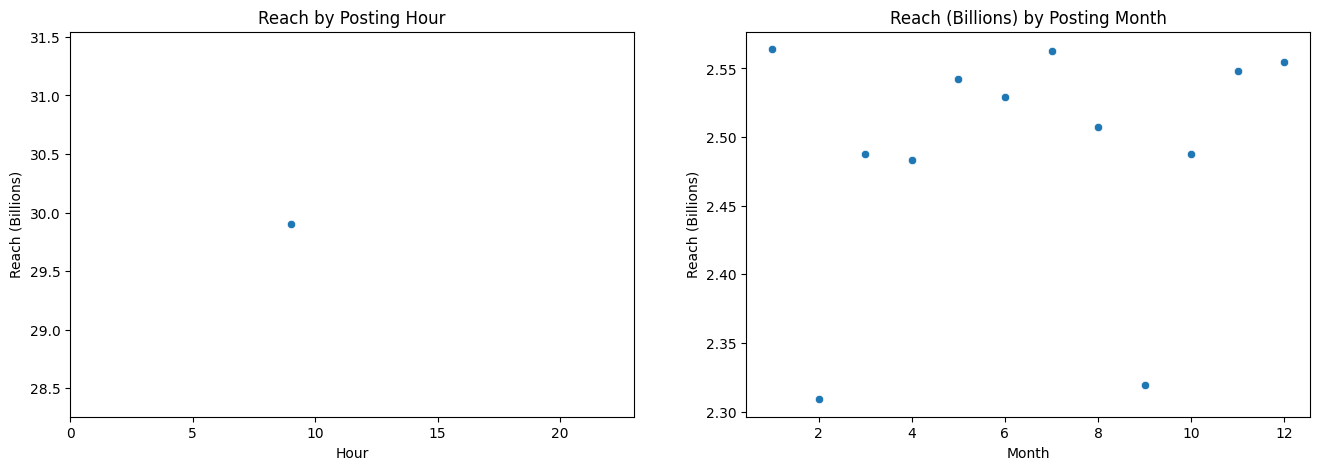

In [20]:
reach_hour = ((da.groupby("hour")["reach"].sum())/1000000000).round(2)
reach_month = ((da.groupby(["month"])["reach"].sum()/1000000000)).round(3)
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.scatterplot(x=reach_hour.index,y=reach_hour.values)
plt.xlim(0,23)
plt.xlabel("Hour")
plt.ylabel("Reach (Billions)")
plt.title("Reach by Posting Hour")

plt.subplot(122)
sns.scatterplot(x=reach_month.index,y=reach_month.values)
plt.xlabel("Month")
plt.ylabel("Reach (Billions)")
plt.title("Reach (Billions) by Posting Month")
plt.show()

#### We observe that all posts reach users at the same hour (9 AM), which is expected given the synthetic nature of the dataset. However, monthly reach varies: most months fall within approximately 2.47–2.57 billion, while February and September show a lower reach of around 2.32 billion. The drop in February is expected due to having fewer days, whereas the decline in September is not unusual in the context of synthetic data.

# **How many hashtags yield the highest reach?**

C:\Users\moust\AppData\Local\Temp\ipykernel_11448\146050610.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reach_per_bin = ((da.groupby('hashtag_bin')['reach'].mean())/1000).round(2)
C:\Users\moust\AppData\Local\Temp\ipykernel_11448\146050610.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=avg_reach_per_bin, x='hashtag_bin', y='reach', palette="viridis")


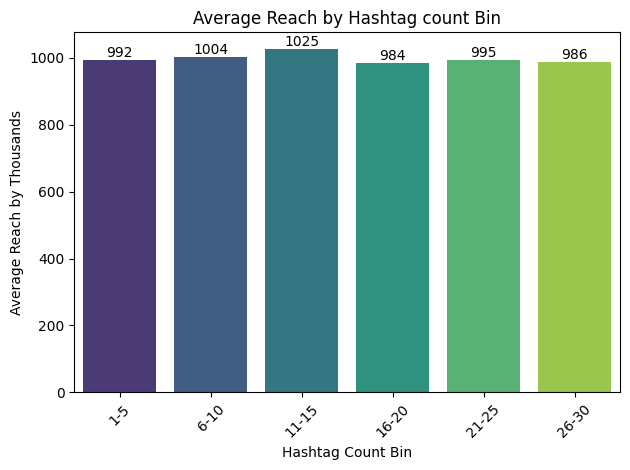

In [21]:
max_hashtags=da["hashtags_count"].max()
bins = range(0, max_hashtags+1, 5)
labels = [f"{i+1}-{i+5}" for i in range(0, max_hashtags, 5)] 
da['hashtag_bin'] = pd.cut(da['hashtags_count'], bins=bins, labels=labels, right=True)
avg_reach_per_bin = ((da.groupby('hashtag_bin')['reach'].mean())/1000).round(2)
avg_reach_per_bin = avg_reach_per_bin.reset_index()
ax=sns.barplot(data=avg_reach_per_bin, x='hashtag_bin', y='reach', palette="viridis")
for i, row in avg_reach_per_bin.iterrows():
    ax.text(
        i, row["reach"] + 0.1,f"{row['reach']:.0f}",ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel("Hashtag Count Bin")
plt.ylabel("Average Reach by Thousands")
plt.title("Average Reach by Hashtag count Bin")
plt.tight_layout()
plt.show()

#### We observe that posts using 11–15 hashtags achieve the highest average reach at approximately 1.025 million. In contrast, the 16–20 and 26–30 hashtag bins show the lowest average reach, at around 984K and 986K respectively, with the remaining bins falling between these values.

# **Are likes and shares related?**


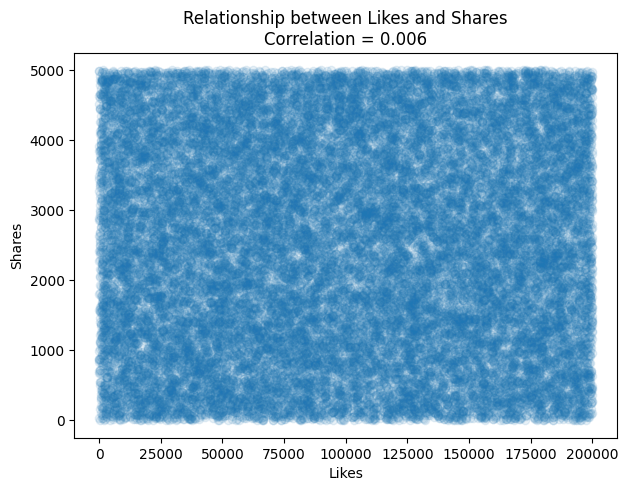

In [22]:
corr_value = da[['likes', 'shares']].corr().iloc[0,1]
plt.figure(figsize=(7,5))
plt.scatter(da['likes'], da['shares'], alpha=0.1) 
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.title(f"Relationship between Likes and Shares\nCorrelation = {corr_value:.3f}")
plt.show()

#### We observe that likes and shares have virtually no correlation (0.006), indicating that they function as distinct engagement signals on Instagram. In other words, the two actions are not intrinsically linked and do not exhibit a meaningful linear relationship.